In [1]:
import torch
import torch.nn as nn # 인공 신경망 모델들 모아놓은 모듈
import torch.nn.functional as F #그중 자주 쓰이는것들을 F로
import torchvision.models as models
import torchvision.transforms
import torchaudio
import torchaudio.transforms as T
import librosa


from torchvision.models import ResNet
from torchvision.models import ResNet18_Weights,VGG16_BN_Weights

import timm

from torchvision.models.resnet import BasicBlock, ResNet
from dropblock import DropBlock2D, LinearScheduler

import torchvision.models as models
from torchvision.models.resnet import ResNet, BasicBlock


################################################################################
### WARNING, path does not exist: KALDI_ROOT=/mnt/matylda5/iveselyk/Tools/kaldi-trunk
###          (please add 'export KALDI_ROOT=<your_path>' in your $HOME/.profile)
###          (or run as: KALDI_ROOT=<your_path> python <your_script>.py)
################################################################################



In [2]:
res18 = models.resnet18(pretrained=True)

d:\anaconda3\envs\local_torch\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
d:\anaconda3\envs\local_torch\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
print(res18)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [2]:
vgg16_bn = models.vgg16_bn(weights=VGG16_BN_Weights.IMAGENET1K_V1)

In [4]:
layer1=vgg16_bn.features[:6]
layer1_maxpool=vgg16_bn.features[6] 

#identity = nn.Identity()
#residual = identity(layer1_maxpool)

layer2=vgg16_bn.features[7:13]

layer2_maxpool=vgg16_bn.features[7:13] 


layer3=vgg16_bn.features[14:23]
layer3_maxpool=vgg16_bn.features[23] 

layer4=vgg16_bn.features[24:33]
layer4_maxpool=vgg16_bn.features[33] 

layer4=vgg16_bn.features[34:43]
layer4_maxpool=vgg16_bn.features[43] 



Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU(inplace=True)
  (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (9): ReLU(inplace=True)
  (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): ReLU(inplace=True)
  (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 

In [18]:
print(vgg16_bn)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [19]:
res = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)

In [ ]:
res = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)

In [20]:
print(res)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [11]:
import pickle
class OpensmileData():
    
    opensmile_dict = dict()
    scaler_list = []

    def __init__(self,opensmile_path):
        #load
        with open(opensmile_path,"rb") as fr:
            OpensmileData.opensmile_dict = pickle.load(fr)
        return
    

In [13]:
dat=OpensmileData("../../../voice_data/all_data_ver2/smile_16000_all.pickle")

In [17]:
dat.opensmile_dict['1149-phrase.wav']

,audspec_lengthL1norm_sma_range,audspec_lengthL1norm_sma_maxPos,audspec_lengthL1norm_sma_minPos,audspec_lengthL1norm_sma_quartile1,audspec_lengthL1norm_sma_quartile2,audspec_lengthL1norm_sma_quartile3,audspec_lengthL1norm_sma_iqr1-2,audspec_lengthL1norm_sma_iqr2-3,audspec_lengthL1norm_sma_iqr1-3,audspec_lengthL1norm_sma_percentile1.0,...,mfcc_sma_de[14]_peakRangeAbs,mfcc_sma_de[14]_peakRangeRel,mfcc_sma_de[14]_peakMeanAbs,mfcc_sma_de[14]_peakMeanMeanDist,mfcc_sma_de[14]_peakMeanRel,mfcc_sma_de[14]_minRangeRel,mfcc_sma_de[14]_meanRisingSlope,mfcc_sma_de[14]_stddevRisingSlope,mfcc_sma_de[14]_meanFallingSlope,mfcc_sma_de[14]_stddevFallingSlope
0,1.343805,0.262712,0.567797,0.249011,0.40119,0.759817,0.152178,0.358628,0.510806,0.044974,...,11.094574,0.594181,3.886722,3.980559,-17.346561,0.476515,120.452591,70.490501,154.093704,76.921753


In [13]:

voice = torch.randn(1,1,32000)
#win_len=1024,n_fft=1024, hop_len=512

stft_scale = T.Spectrogram(
    n_fft=1024,
    win_length=1024,
    hop_length=512,
    center=True,
    pad_mode="constant",
    power=2.0,
)

stft_scale(voice).squeeze(1)[:,:229,:].size()


torch.Size([1, 229, 63])

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("C:/Users/USER/Desktop/trash/train_result_4.csv",index_col=0)
fail_df = pd.read_csv("C:/Users/USER/Desktop/trash/train_result_5.csv",index_col=0)

df

,0,1,2,3,4,5,6,7,8,9,...,6875,6876,6877,6878,6879,6880,6881,6882,6883,6884
0,0.496976,0.272681,0.000000,0.360887,0.680443,0.562500,0.881048,0.390121,0.700605,0.653226,...,1.245999,1.185772,0.000000,0.000000,0.000000,1.278860,0.000000,0.000000,1.144316,1.246368
1,0.783266,0.838206,0.635585,0.847782,0.969758,0.938508,0.974798,0.682460,0.928427,0.697581,...,0.982490,1.010517,0.000000,0.000000,0.000000,0.997606,0.000000,0.000000,0.995638,0.996000
2,0.093750,0.186996,0.000000,0.810484,0.533266,0.448589,0.077621,0.381048,0.178427,0.638105,...,0.000000,0.000000,0.839355,0.815514,0.633869,0.000000,0.887989,0.811340,0.000000,0.000000
3,0.615927,0.031250,0.322581,0.494960,0.709677,0.948589,0.844758,0.988911,0.982863,0.601815,...,0.000000,0.000000,0.978413,0.916885,1.000332,0.000000,0.995364,1.047141,0.000000,0.000000
4,0.387097,0.630040,0.000000,0.667339,0.340726,0.241935,0.047379,0.192540,0.076613,0.931452,...,0.811173,0.885102,0.000000,0.000000,0.000000,0.840769,0.000000,0.000000,0.854606,0.820132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,0.857863,0.106855,0.994960,0.688508,0.962702,0.960685,0.985887,0.882057,0.978831,0.297379,...,0.000000,0.000000,0.493431,0.613509,0.225319,0.000000,0.538345,0.598139,0.000000,0.000000
810,0.789315,0.370968,0.300403,0.396169,0.432460,0.535282,0.578629,0.704637,0.643145,0.437500,...,0.000000,0.000000,0.723666,0.799298,0.462776,0.000000,0.737674,0.669210,0.000000,0.000000
811,0.166331,0.180444,0.733871,0.068548,0.065524,0.175403,0.366936,0.587702,0.465726,0.262097,...,1.322215,1.256123,0.000000,0.000000,0.000000,1.305936,0.000000,0.000000,1.242985,1.289368
812,0.394153,0.286290,0.589214,0.447581,0.449597,0.432460,0.533266,0.471774,0.472782,0.881048,...,1.360467,1.253085,0.000000,0.000000,0.000000,1.315692,0.000000,0.000000,1.247799,1.303565


In [27]:
fail_df

,0,1,2,3,4,5,6,7,8,9,...,6875,6876,6877,6878,6879,6880,6881,6882,6883,6884
0,0.217742,0.392137,0.750000,0.287298,0.414314,0.427419,0.676411,0.524193,0.573589,0.130040,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.256474,1.231765,1.280433,0.695409,1.186413
1,0.140121,0.771169,0.598790,0.226815,0.187500,0.517137,0.301411,0.888105,0.734879,0.790323,...,1.065342,1.051324,0.227934,1.041802,0.536224,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.550403,0.084677,0.718750,0.100806,0.554435,0.707661,0.935484,0.814516,0.921371,0.280242,...,1.073527,1.189197,0.000000,0.885954,0.188042,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.558468,0.750504,0.643145,0.445564,0.394153,0.211694,0.430444,0.089718,0.157258,0.081653,...,0.633356,0.601872,0.932129,0.759242,0.963308,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.286290,0.725807,0.646169,0.393145,0.223790,0.038306,0.160282,0.010081,0.012097,0.219758,...,0.984688,0.879261,0.521479,0.995056,0.738736,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,0.910282,0.408266,0.570565,0.562500,0.580645,0.832661,0.597782,0.934476,0.872984,0.439516,...,0.769370,0.657464,0.789642,0.896552,0.967313,0.000000,0.000000,0.000000,0.000000,0.000000
806,0.933468,0.228831,0.000000,0.110887,0.091734,0.306452,0.315524,0.756048,0.574597,0.041331,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.282534,1.337287,1.364106,0.600684,1.222818
807,0.055444,0.213710,0.970766,0.333669,0.173387,0.182460,0.121976,0.336694,0.185484,0.633065,...,0.000000,0.000000,0.311945,0.000000,0.000000,0.517108,0.610984,0.524882,0.673067,0.674888
808,0.587702,0.881048,0.452621,0.785282,0.627016,0.741935,0.310484,0.800403,0.623992,0.432460,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.761779,0.643471,0.712812,0.696954,0.873210


In [28]:
fail_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,6875,6876,6877,6878,6879,6880,6881,6882,6883,6884
count,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,...,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000
mean,0.503114,0.503445,0.465135,0.510058,0.508303,0.506633,0.501600,0.500895,0.501047,0.504258,...,0.437024,0.411585,0.303610,0.455520,0.385502,0.451205,0.445081,0.472503,0.332159,0.469288
std,0.291735,0.287641,0.339557,0.288950,0.287544,0.287886,0.291192,0.289462,0.289815,0.291457,...,0.474706,0.467105,0.367303,0.471480,0.426724,0.524119,0.511813,0.543783,0.337735,0.510594
min,0.000000,0.001008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.248236,0.255292,0.000000,0.261341,0.269405,0.267389,0.250252,0.254284,0.248236,0.252268,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.505040,0.510081,0.513357,0.512601,0.507561,0.505544,0.509073,0.501512,0.503528,0.506552,...,0.202932,0.217600,0.083902,0.258123,0.129146,0.000000,0.000000,0.004865,0.125706,0.041778
75%,0.755796,0.751638,0.752772,0.760837,0.755796,0.748740,0.751764,0.751764,0.748740,0.757560,...,0.835175,0.758982,0.590542,0.900068,0.810813,0.879793,0.877768,0.921174,0.662144,0.923072
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.327151,2.474776,1.260449,1.829876,1.228671,2.197326,2.110722,2.447684,1.035482,1.872196


In [24]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,6875,6876,6877,6878,6879,6880,6881,6882,6883,6884
count,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,...,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000
mean,0.499382,0.495271,0.474686,0.497133,0.498156,0.499742,0.504038,0.501745,0.503456,0.498904,...,0.441997,0.451586,0.420992,0.487094,0.445326,0.411686,0.466783,0.410087,0.503812,0.485408
std,0.288251,0.291255,0.336338,0.293871,0.289526,0.292282,0.288286,0.290206,0.289264,0.286041,...,0.494901,0.517288,0.463530,0.484814,0.494002,0.510847,0.539216,0.522887,0.508672,0.479125
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001008,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.254536,0.246094,0.000000,0.242692,0.247984,0.238659,0.251764,0.257812,0.251512,0.253780,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.495464,0.485887,0.524698,0.489919,0.492440,0.501512,0.507561,0.500504,0.512601,0.492440,...,0.000000,0.000000,0.000000,0.571051,0.000000,0.000000,0.000000,0.000000,0.450981,0.579564
75%,0.755544,0.745338,0.765373,0.755292,0.746220,0.755292,0.756300,0.750252,0.752268,0.748236,...,0.915941,0.924217,0.880552,0.960793,0.911182,0.797258,0.949984,0.799279,1.008452,0.969259
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.073308,2.733532,1.839819,1.274694,2.688011,3.844746,3.045006,4.072997,1.308261,1.164708


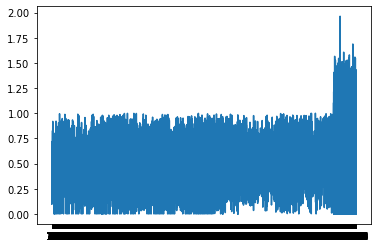

In [25]:
plt.plot(df.loc[0])

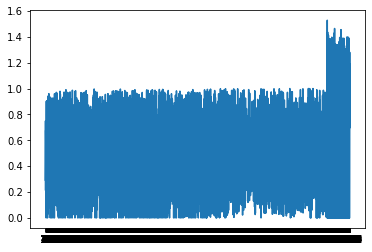

In [29]:
plt.plot(fail_df.loc[0])

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("C:/Users/USER/Desktop/trash/post_train_result_4.csv",index_col=0)
fail_df = pd.read_csv("C:/Users/USER/Desktop/trash/post_train_result_5.csv",index_col=0)

df

,0,1,2,3,4,5,6,7,8,9,...,6875,6876,6877,6878,6879,6880,6881,6882,6883,6884
0,0.014135,-0.782935,-1.299339,-0.455378,0.637046,0.241520,1.308213,-0.359470,0.700428,0.552503,...,1.446965,1.313414,-0.966745,-0.977276,-0.849760,1.490440,-0.975897,-0.937010,1.282271,1.433959
1,1.000751,1.167118,0.571791,1.242285,1.628926,1.524719,1.631924,0.649334,1.483694,0.705519,...,0.942002,0.976194,-0.966745,-0.977276,-0.849760,0.953796,-0.975897,-0.937010,0.990164,0.955038
2,-1.375465,-1.078398,-1.299339,1.112236,0.132467,-0.147223,-1.465959,-0.390778,-1.094845,0.500339,...,-0.940750,-0.968222,0.720689,0.704066,0.238532,-0.949676,0.796855,0.604403,-0.965974,-0.950184
3,0.424067,-1.615444,-0.349677,0.012095,0.737271,1.559121,1.182905,1.706839,1.670846,0.375144,...,-0.940750,-0.968222,1.000250,0.913060,0.867714,-0.949676,1.011215,1.052386,-0.965974,-0.950184
4,-0.364531,0.449318,-1.299339,0.613131,-0.527634,-0.852466,-1.570382,-1.041283,-1.444889,1.512329,...,0.613706,0.734872,-0.966745,-0.977276,-0.849760,0.654546,-0.975897,-0.937010,0.713076,0.618623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,1.257827,-1.354742,1.629774,0.686942,1.604733,1.600403,1.670213,1.338104,1.656983,-0.675100,...,-0.940750,-0.968222,0.025246,0.287591,-0.462908,-0.949676,0.098837,0.199356,-0.965974,-0.950184
810,1.021595,-0.444022,-0.414967,-0.332359,-0.213136,0.148635,0.263982,0.725864,0.502879,-0.191710,...,-0.940750,-0.968222,0.488109,0.670632,-0.055217,-0.949676,0.496772,0.334380,-0.965974,-0.950184
811,-1.125337,-1.100992,0.861141,-1.474679,-1.471129,-1.079520,-0.466979,0.322342,-0.107099,-0.796817,...,1.593018,1.448783,-0.966745,-0.977276,-0.849760,1.542101,-0.975897,-0.937010,1.476128,1.516213
812,-0.340213,-0.736009,0.435277,-0.153102,-0.154383,-0.202267,0.107348,-0.077701,-0.082838,1.338447,...,1.666321,1.442937,-0.966745,-0.977276,-0.849760,1.560717,-0.975897,-0.937010,1.485586,1.543370


In [35]:
fail_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,6875,6876,6877,6878,6879,6880,6881,6882,6883,6884
count,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,...,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02
mean,-1.301333e-08,-1.507914e-08,-3.127407e-08,-7.510247e-09,3.803210e-10,2.273704e-09,1.277926e-08,-9.867654e-10,-1.107404e-08,-1.271370e-08,...,5.720988e-09,2.179383e-08,-1.623188e-08,-4.938273e-11,-2.391580e-08,-1.080321e-08,4.300000e-08,-5.570123e-09,1.085185e-08,-2.032395e-08
std,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,...,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00
min,-1.725625e+00,-1.747827e+00,-1.370676e+00,-1.766302e+00,-1.768835e+00,-1.760930e+00,-1.723642e+00,-1.731505e+00,-1.729916e+00,-1.731193e+00,...,-9.211884e-01,-8.816850e-01,-8.271040e-01,-9.667460e-01,-9.039562e-01,-8.614139e-01,-8.701534e-01,-8.694546e-01,-9.840978e-01,-9.196687e-01
25%,-8.742031e-01,-8.632481e-01,-1.370676e+00,-8.612943e-01,-8.313371e-01,-8.315524e-01,-8.637046e-01,-8.524892e-01,-8.728558e-01,-8.651179e-01,...,-9.211884e-01,-8.816850e-01,-8.271040e-01,-9.667460e-01,-9.039562e-01,-8.614139e-01,-8.701534e-01,-8.694546e-01,-9.840978e-01,-9.196687e-01
50%,6.607746e-03,2.308403e-02,1.421020e-01,8.804755e-03,-2.585458e-03,-3.784912e-03,2.567631e-02,2.133888e-03,8.567960e-03,7.878780e-03,...,-4.934338e-01,-4.155500e-01,-5.985356e-01,-4.189349e-01,-6.011235e-01,-8.614139e-01,-8.701534e-01,-8.605030e-01,-6.116651e-01,-8.377951e-01
75%,8.666733e-01,8.633898e-01,8.476195e-01,8.684312e-01,8.612457e-01,8.415014e-01,8.596335e-01,8.672109e-01,8.551870e-01,8.696276e-01,...,8.392482e-01,7.441816e-01,7.816695e-01,9.434590e-01,9.973060e-01,8.182366e-01,8.459238e-01,8.256018e-01,9.776609e-01,8.892875e-01
max,1.704265e+00,1.727366e+00,1.576159e+00,1.696640e+00,1.711045e+00,1.714818e+00,1.712643e+00,1.725319e+00,1.722689e+00,1.701959e+00,...,3.984137e+00,4.419701e+00,2.606654e+00,2.916781e+00,1.977134e+00,3.333593e+00,3.256407e+00,3.634537e+00,2.083762e+00,2.749297e+00


In [36]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,6875,6876,6877,6878,6879,6880,6881,6882,6883,6884
count,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,...,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02,8.140000e+02
mean,8.807371e-09,3.528993e-09,-3.740737e-08,-4.555528e-09,7.028870e-09,1.060946e-08,2.466953e-09,-8.932064e-09,-1.074201e-08,-3.105319e-09,...,1.971314e-08,2.965602e-08,1.533907e-08,2.842752e-08,2.025037e-08,-7.648649e-09,-3.058968e-09,-6.104975e-09,-1.171376e-08,1.163268e-08
std,1.000615e+00,1.000615e+00,1.000615e+00,1.000615e+00,1.000615e+00,1.000615e+00,1.000615e+00,1.000615e+00,1.000615e+00,1.000615e+00,...,1.000615e+00,1.000615e+00,1.000615e+00,1.000615e+00,1.000615e+00,1.000615e+00,1.000615e+00,1.000615e+00,1.000615e+00,1.000615e+00
min,-1.698547e+00,-1.723201e+00,-1.299339e+00,-1.713687e+00,-1.695770e+00,-1.678117e+00,-1.733978e+00,-1.705702e+00,-1.708288e+00,-1.701001e+00,...,-9.407500e-01,-9.682217e-01,-9.667448e-01,-9.772764e-01,-8.497595e-01,-9.496757e-01,-9.758971e-01,-9.370097e-01,-9.659740e-01,-9.501840e-01
25%,-8.873681e-01,-8.711395e-01,-1.299339e+00,-8.648554e-01,-8.689164e-01,-8.791279e-01,-8.629162e-01,-8.803960e-01,-8.687034e-01,-8.794108e-01,...,-9.407500e-01,-9.682217e-01,-9.667448e-01,-9.772764e-01,-8.497595e-01,-9.496757e-01,-9.758971e-01,-9.370097e-01,-9.659740e-01,-9.501840e-01
50%,-2.060496e-02,-8.284392e-04,9.325084e-02,-2.656849e-02,-1.959825e-02,-7.894699e-03,-9.257815e-03,-6.388870e-03,-1.525536e-02,8.254043e-03,...,-5.009558e-01,-3.623802e-01,-6.875436e-01,-5.764382e-01,-8.497595e-01,-4.586261e-01,-5.663117e-01,-8.235892e-01,-4.227716e-01,-4.546947e-01
75%,8.643966e-01,8.633995e-01,8.633671e-01,8.495029e-01,8.781042e-01,8.943004e-01,8.644151e-01,8.467465e-01,8.901793e-01,8.707061e-01,...,9.122676e-01,9.516633e-01,9.544703e-01,9.551997e-01,8.180077e-01,9.072875e-01,9.555791e-01,9.228165e-01,9.446172e-01,9.041162e-01
max,1.747661e+00,1.725021e+00,1.644612e+00,1.773024e+00,1.732606e+00,1.734572e+00,1.718943e+00,1.745104e+00,1.729764e+00,1.741852e+00,...,3.013247e+00,2.483068e+00,2.368831e+00,2.249022e+00,3.937368e+00,2.867275e+00,2.016461e+00,3.084838e+00,2.553179e+00,2.827470e+00


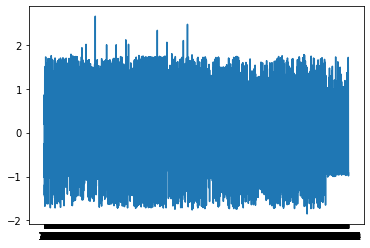

In [37]:
plt.plot(fail_df.loc[3])

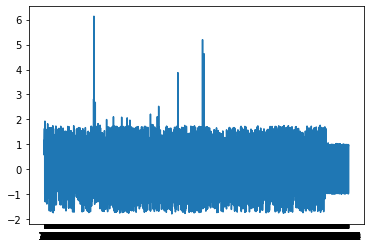

In [38]:
plt.plot(df.loc[1])